feature_data: (178, 13)
feature_data: (178,)
178
[ 1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1  1
 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1
  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1
 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1  1 -1 -1]
[-1  1 -1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
(?, 2)
<tf.Variable 'weight:0' shape=(2, 1) dtype=float32_ref>
Step #100 W = [[-0.62483513]
 [-0.00785949]] B= [[-0.99730474]]
Loss = [0.8812568]
Step #200 W = [[-0.70430857]
 [ 0.17694987]] B= [[-0.89406604]]
Loss = [0.8797171]
Step #300 W = [[-0.7658476 ]
 [ 0.33865365]] B= [[-0.79371464]]
Loss = [0.68610513]
Step #400 W = [[-0.8090972]
 [ 0.4605728]] B= [[-0.69280005]]
Loss = [0.7487886]
Step #500 W =

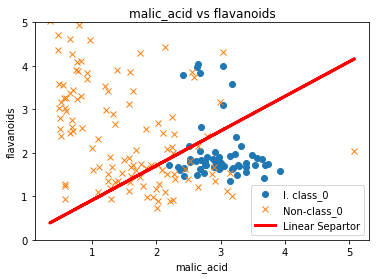

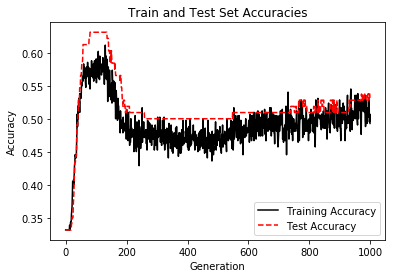

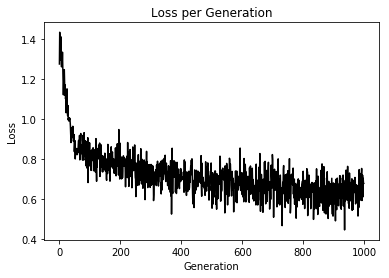

In [67]:
from sklearn import datasets
wine = datasets.load_wine()
print("feature_data:",wine.data.shape)
print("feature_data:",wine.target.shape)
import numpy as np
X = np.array([[x[1],x[6]] for x in wine.data])
Y = np.array([1 if y==0 else -1 for y in wine.target])
print(len(Y))
train = np.random.choice(len(X),round(len(X)*0.8),replace=False)
test = np.array(list(set(range(len(X)))-set(train)))
X_tr = X[train]
X_te = X[test]
Y_tr = Y[train]
Y_te = Y[test]
print(Y_tr)
print(Y_te)
import tensorflow as tf
batch_size = len(train)
X_var = tf.placeholder(shape = [None, 2], dtype =tf.float32)
Y_var = tf.placeholder(shape = [None,1] , dtype =tf.float32)

W = tf.Variable(tf.random_normal(shape=[2,1]),name='weight')
B = tf.Variable(tf.random_normal(shape=[1,1]),name='bias')

print(X_var.shape)
print(W)

Output = tf.subtract(tf.matmul(X_var,W),B)
alpha = tf.constant([0.01])
#l2_norm
l2_norm = tf.reduce_sum(tf.square(W))
#margin_term in Loss
classification_term = tf.reduce_mean(tf.maximum(0.,tf.subtract(1.,tf.multiply(Output,Y_var))))
loss = tf.add(classification_term,tf.multiply(alpha,l2_norm))
# accuracy 및 optimizer정의
sess = tf.Session()
pred = tf.sign(Output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,Y),tf.float32))

my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
train_accuracy =[]
test_accuracy=[]
for i in range(1000):
    rand_index = np.random.choice(len(X_tr),size=batch_size)
    rand_x = X_tr[rand_index]
    rand_y = np.transpose([Y_tr[rand_index]])
    sess.run(train_step, feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    
    temp_loss = sess.run(loss,feed_dict={
        X_var : rand_x,
        Y_var : rand_y
    })
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy,feed_dict={
        X_var : rand_x,
        Y_var : np.transpose([Y_tr])
    })
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={
        X_var : X_te,
        Y_var : np.transpose([Y_te])
    })
    
    test_accuracy.append(test_acc_temp)
    
    if(i+1)%100==0:
        print('Step #{} W = {} B= {}'.format(str(i+1),str(sess.run(W)),str(sess.run(B))))
        print('Loss = ' + str(temp_loss))
        
#Ectract coefficients
[[a1],[a2]] = sess.run(W)
[[b]] = sess.run(B)
slope = -a2/a1
y_intercept = b/a1

#Extract x1 and x2 vals
x1_vals = [d[1] for d in X]

#Get best fit line
best_fit=[]
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

#Separate 1. class_0
class_0_x = [d[1] for i, d in enumerate(X) if Y[i] == 1]
class_0_y = [d[0] for i, d in enumerate(X) if Y[i] == 1]
not_class_0_x = [d[1] for i,d in enumerate(X) if Y[i] == -1]
not_class_0_y = [d[0] for i,d in enumerate(X) if Y[i] == -1]
from tensorflow.python.framework import ops
ops.reset_default_graph()
%matplotlib inline
import matplotlib.pyplot as plt
#Plot data and Line
plt.plot(class_0_x, class_0_y, 'o', label='I. class_0')
plt.plot(not_class_0_x,not_class_0_y, 'x', label = 'Non-class_0')
plt.plot(x1_vals,best_fit, 'r-',label='Linear Separtor',linewidth=3)
plt.ylim([0,5])
plt.legend(loc='lower right')
plt.title('malic_acid vs flavanoids')
plt.xlabel('malic_acid')
plt.ylabel('flavanoids')
plt.show()

#plot train/test accuracies
plt.plot(train_accuracy, 'k-', label = 'Training Accuracy')
plt.plot(test_accuracy,'r--',label = 'Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

#Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()


In [37]:
from sklearn import datasets
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
%matplotlib inline
import matplotlib.pyplot as plt


wine = datasets.load_wine()
print("feature_data:",wine.data.shape)
print("feature_data:",wine.target.shape)
print(wine.target)
X = np.array([x for x in wine.data])

print('features name = \n',wine['feature_names'])
print('\ntarget_features =\n',wine['target_names'])

feature_data: (178, 13)
feature_data: (178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
features name = 
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

target_features =
 ['class_0' 'class_1' 'class_2']


In [31]:
import pandas as pd
data = pd.DataFrame(X,columns = wine['feature_names'])
data['type'] = wine.target # data 추가한거구나

num_species = len(data['type'].unique()) # 질문
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
